# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

## a)

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy

In [127]:
x = sympy.Symbol('x')

In [147]:
def y(x):
    return sympy.sin(x)
y(x)

sin(x)

In [146]:
def z(x):
    return sympy.cos(x)
z(x)

cos(x)

In [145]:
def w(x):
    return 1/(sympy.sin(2*x)+sympy.cos(x))
w(x)

1/(sin(2*x) + cos(x))

## b)

In [162]:
g = y(x) * z(x)
sympy.diff(g) #derivada de g

-sin(x)**2 + cos(x)**2

## c)

Text(0.5, 1.0, 'Gráfica de la funcion w de 0 a 1')

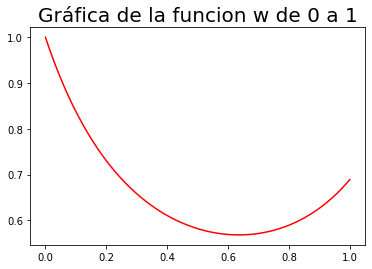

In [158]:
X = np.arange(0, 1, 0.001)
plt.plot(X, [w(i) for i in X], color="red") #No encontre otra forma de hacerlo
plt.title("Gráfica de la funcion w de 0 a 1", size = 20)

## d)

In [160]:
sympy.integrate(g, (x, 0, 1))

sin(1)**2/2

## e)

In [164]:
sympy.limit(y(x), x, 0)

0

In [165]:
sympy.limit(z(x), x, 0)

1

In [166]:
sympy.limit(g, x, 0)

0

In [167]:
sympy.limit(w(x), x, 0)

1

## f)

In [168]:
def SerieDeTaylorOrden3(f):
    a = sympy.Symbol('a') #Necesario para la serie de Taylor
    for i in range(1, 4):
        f += sympy.diff(f, x, i)/sympy.factorial(i)*(x - a)**i #Es la fomra de la sumatoria de Taylor
    return f

In [169]:
SerieDeTaylorOrden3(y(x))

(-a + x)**3*((a - x)**2*((a - x)*sin(x) + 6*cos(x))/12 + (a - x)*((a - x)*cos(x) - 5*sin(x))/2 - 2*(a - x)*sin(x)/3 - 8*cos(x)/3) + (-a + x)**2*((a - x)*cos(x)/2 - 3*sin(x)/2) + (-a + x)*cos(x) + sin(x)

In [170]:
SerieDeTaylorOrden3(z(x))

(-a + x)**3*((a - x)**2*((a - x)*cos(x) - 6*sin(x))/12 - (a - x)*((a - x)*sin(x) + 5*cos(x))/2 - 2*(a - x)*cos(x)/3 + 8*sin(x)/3) - (-a + x)**2*((a - x)*sin(x) + 3*cos(x))/2 - (-a + x)*sin(x) + cos(x)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

## a)

In [177]:
y = sympy.Symbol('y')
z = sympy.Symbol('z')
dt = sympy.Symbol('dt')
a = sympy.Symbol('a')
b = sympy.Symbol('b')
c = sympy.Symbol('c')

In [189]:
dx = -y -z
dx

-y - z

In [190]:
dy = x + a*y
dy

x + 0.13*y

In [191]:
dz = b + z*(x-c)
dz

z*(x - 6.5) + 0.2

In [193]:
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [188]:
a, b, c = 0.13, 0.2, 6.5